In [ ]:
import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aufgabe 5.1

In [ ]:
anscombe = pd.read_csv('./data/anscombe.csv')

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].scatter(anscombe['x1'], anscombe['y1'])
ax[0, 1].scatter(anscombe['x2'], anscombe['y2'])
ax[1, 0].scatter(anscombe['x3'], anscombe['y3'])
ax[1, 1].scatter(anscombe['x4'], anscombe['y4'])
plt.show()

In [44]:
# Koorelationskoeffizienten berechnen: 
print(f'x1 / x1: {(anscombe['x1'].corr(anscombe['y1'])):.3f}')
print(f'x2 / x2: {(anscombe['x2'].corr(anscombe['y2'])):.3f}')
print(f'x3 / x3: {(anscombe['x3'].corr(anscombe['y3'])):.3f}')
print(f'x4 / x4: {(anscombe['x4'].corr(anscombe['y4'])):.3f}')

x1 / x1: 0.816
x2 / x2: 0.816
x3 / x3: 0.816
x4 / x4: 0.817


# Aufgabe 5.2

In [56]:
tau = 30
T = 5*60


Flache_Total = T**2
Flache_Tau = Flache_Total-(T-tau)**2
P = Flache_Tau/Flache_Total
P
# P = 1-(1-(tau/T))**2
# P

0.19

# Aufgabe 5.3

In [58]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd

df = pd.read_csv("./data/chemical_shifts.csv",header=None)
df.head()

,0
0,51.06
1,55.12
2,53.73
3,50.24
4,52.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.484,0.495,52.588,54.441,0.012,0.009,1654.0,2364.0,1.0


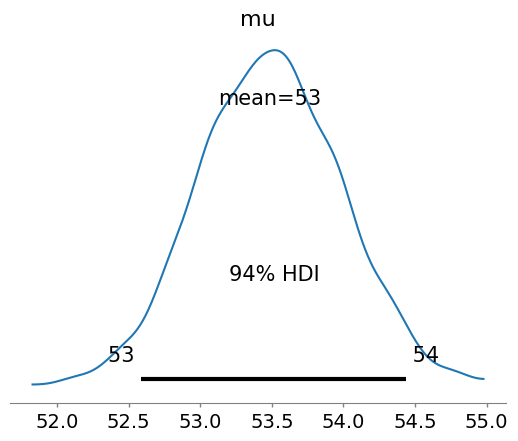

In [59]:
upper = 80
lower = 30

data    = df
sigma   = data.std()    # Standardabweichung (schätzung aus den Daten)

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=lower, upper=upper)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace = pm.sample(1000)
az.plot_posterior(trace, point_estimate='mean', hdi_prob=0.94)
az.summary(trace)